# Stoich45 Model Analysis - Random Forest Regressor


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler

import time
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict



In [2]:
int_df = pd.read_csv('Stoich45_FeatureSelected_dataset.csv')
int_df

,atomic_num_standard_deviation,atomic_num_max,group_num_mean,period_num_mean,electronegativity_min,electron_affinity_mean,electron_affinity_geometric_mean,electron_affinity_standard_deviation,melting_mean,melting_geometric_mean,...,density_geometric_mean,density_standard_deviation,density_max,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min,outputs.hse06.bandgap,MOF
0,5.689851,29.0,7.960000,1.600000,1.90,100.252000,82.167123,45.559861,1143.143600,107.487344,...,4.182460,1912.665927,8960.0,1233.652000,1223.402105,146.933016,1402.3,745.5,3.751390,qmof-0000295
1,3.088689,19.0,13.700000,2.050000,0.82,110.030000,72.816144,57.821122,1199.022000,206.066393,...,15.205775,1023.803409,2260.0,1218.510000,1187.405501,219.174061,1402.3,418.8,3.014584,qmof-000512e
2,6.272068,30.0,10.363636,1.818182,1.65,100.818182,0.000000,58.491030,1114.843636,141.329527,...,8.874182,1680.181346,7140.0,1230.522727,1221.752785,142.324105,1402.3,906.4,3.284171,qmof-00052d0
3,8.169828,48.0,8.687500,1.656250,1.69,110.787500,0.000000,42.372240,1231.431562,122.519183,...,5.589511,1726.258029,8650.0,1228.065625,1221.424040,122.525772,1313.9,867.8,5.170849,qmof-0006638
4,4.436880,27.0,9.097561,1.658537,1.88,104.460976,82.484786,49.421674,1552.056341,186.153480,...,10.509249,1648.227778,8900.0,1219.541463,1210.807020,139.686543,1402.3,760.4,3.978235,qmof-002580c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,6.968540,29.0,11.352941,2.000000,1.90,121.117647,67.620679,100.512201,1467.541765,253.964277,...,17.891800,2183.677437,8960.0,1213.182353,1199.398347,171.503666,1402.3,745.5,3.030492,qmof-ffe63dd
8350,11.575955,48.0,11.185185,2.000000,1.69,93.111111,0.000000,62.259852,935.485926,130.152404,...,8.712412,2311.005049,8650.0,1234.559259,1223.359359,158.253641,1402.3,867.8,4.483906,qmof-ffeae31
8351,8.317703,48.0,10.903226,1.903226,1.69,102.548387,0.000000,64.328877,1786.626452,330.048989,...,40.085683,1712.755584,8650.0,1193.154839,1183.393508,151.921017,1402.3,867.8,3.510606,qmof-ffeef76
8352,5.857798,30.0,9.739130,1.739130,1.65,116.756522,0.000000,44.348843,1706.767826,241.158462,...,19.449685,1662.683156,7140.0,1196.652174,1189.732816,126.320937,1313.9,906.4,4.055379,qmof-fff4e91


Load and preprocess

In [3]:
# Extract the target variable
y = int_df['outputs.hse06.bandgap']

# Drop target from feature set
X = int_df.drop(columns=['outputs.hse06.bandgap', 'MOF'])

# Standardize features
scaler_int = StandardScaler()

X = scaler_int.fit_transform(X)

Split data into Train, Validation, and Test Sets

In [4]:
seed = 1234

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=seed)

Train a simple Random Forest

In [5]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    """Train model and evaluate performance."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    
    return rmse, r2

# Initialize model
model_int = RandomForestRegressor(n_estimators=100, random_state=seed)

# Evaluate Intersection-based features
rmse_int, r2_int = evaluate_model(model_int, X_train, y_train, X_cv, y_cv)
print(f"Intersection Features - RMSE: {rmse_int:.4f}, R²: {r2_int:.4f}")

Intersection Features - RMSE: 0.7291, R²: 0.5450


Perform Hyperparameter Tuning

Attempt 1:

In [6]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 'auto']
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=seed)

In [7]:
# Perform Grid Search with 4-fold CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=4, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 243 candidates, totalling 972 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

/Users/simran/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   5.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END max_depth=None,

/Users/simran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
304 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/simran/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/simran/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/simran/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [10]:
# Best parameters
best_params_1 = grid_search.best_params_
print("Best Parameters:", best_params_1)

# Best model
best_rf_1 = grid_search.best_estimator_
print("Best Model:", best_rf_1)

# Define 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred_cv = cross_val_predict(best_rf_1, X_cv, y_cv, cv=kf)

# Metrics
mse_cv_1 = mean_squared_error(y_cv, y_pred_cv)
mae_cv_1 = mean_absolute_error(y_cv, y_pred_cv)

print(f"4-Fold CV MSE: {mse_cv_1:.4f}")
print(f"4-Fold CV MAE: {mae_cv_1:.4f}")



# Predictions and performance evaluation
y_pred = best_rf_1.predict(X_cv)
mse_1 = mean_squared_error(y_cv, y_pred)
r2_1 = r2_score(y_cv, y_pred)

print(f"Final Model MSE: {mse_1:.4f}")
print(f"Final Model R²: {r2_1:.4f}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model: RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=1234)
4-Fold CV MSE: 0.6150
4-Fold CV MAE: 0.5979
Final Model MSE: 0.5112
Final Model R²: 0.5624


/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

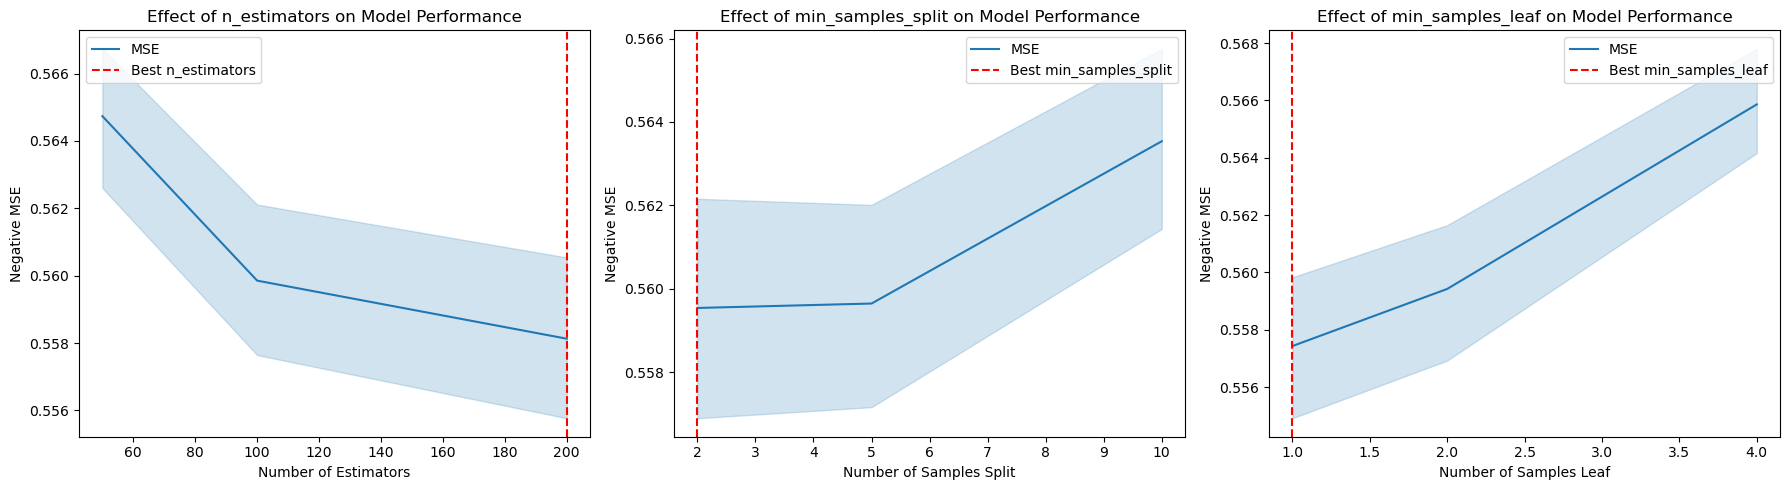

In [11]:
# Convert results to a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Plot hyperparameter tuning results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot effect of n_estimators
sns.lineplot(ax=axes[0], x=cv_results["param_n_estimators"], y=-cv_results["mean_test_score"], label="MSE")
axes[0].axvline(x=grid_search.best_params_['n_estimators'], color='r', linestyle='--', label='Best n_estimators')
axes[0].set_xlabel("Number of Estimators")
axes[0].set_ylabel("Negative MSE")
axes[0].set_title("Effect of n_estimators on Model Performance")
axes[0].legend()

# Plot effect of min_samples_split
sns.lineplot(ax=axes[1], x=cv_results["param_min_samples_split"], y=-cv_results["mean_test_score"], label="MSE")
axes[1].axvline(x=grid_search.best_params_['min_samples_split'], color='r', linestyle='--', label='Best min_samples_split')
axes[1].set_xlabel("Number of Samples Split")
axes[1].set_ylabel("Negative MSE")
axes[1].set_title("Effect of min_samples_split on Model Performance")
axes[1].legend()

# Plot effect of min_samples_leaf
sns.lineplot(ax=axes[2], x=cv_results["param_min_samples_leaf"], y=-cv_results["mean_test_score"], label="MSE")
axes[2].axvline(x=grid_search.best_params_['min_samples_leaf'], color='r', linestyle='--', label='Best min_samples_leaf')
axes[2].set_xlabel("Number of Samples Leaf")
axes[2].set_ylabel("Negative MSE")
axes[2].set_title("Effect of min_samples_leaf on Model Performance")
axes[2].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Attempt 2: Fine tune some parameters further while using optimum value for others

In [13]:
# Define parameter grid
param_grid_2 = {
    'n_estimators': [200, 225, 250, 275, 300, 350, 400, 450, 500],
    'max_depth': [None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Perform Grid Search with 4-fold CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_2, 
                           cv=4, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=225; total time=   5.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=225; total time=   5.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=225; total time=   5.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, 

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2, 3],
                         'n_estimators': [200, 225, 250, 275, 300, 350, 400,
                                          450, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
# Best parameters
best_params_2 = grid_search.best_params_
print("Best Parameters:", best_params_2)

# Best model
best_rf_2 = grid_search.best_estimator_
print("Best Model:", best_rf_2)

# Define 4-fold cross-validation
kf2 = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred_cv = cross_val_predict(best_rf_2, X_cv, y_cv, cv=kf2)

# Metrics
mse_cv_2 = mean_squared_error(y_cv, y_pred_cv)
mae_cv_2 = mean_absolute_error(y_cv, y_pred_cv)

print(f"4-Fold CV MSE: {mse_cv_2:.4f}")
print(f"4-Fold CV MAE: {mae_cv_2:.4f}")



# Predictions and performance evaluation
y_pred = best_rf_2.predict(X_cv)
mse_2 = mean_squared_error(y_cv, y_pred)
r2_2 = r2_score(y_cv, y_pred)

print(f"Final Model MSE: {mse_2:.4f}")
print(f"Final Model R²: {r2_2:.4f}")


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Model: RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=1234)
4-Fold CV MSE: 0.6134
4-Fold CV MAE: 0.5965
Final Model MSE: 0.5110
Final Model R²: 0.5626


/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

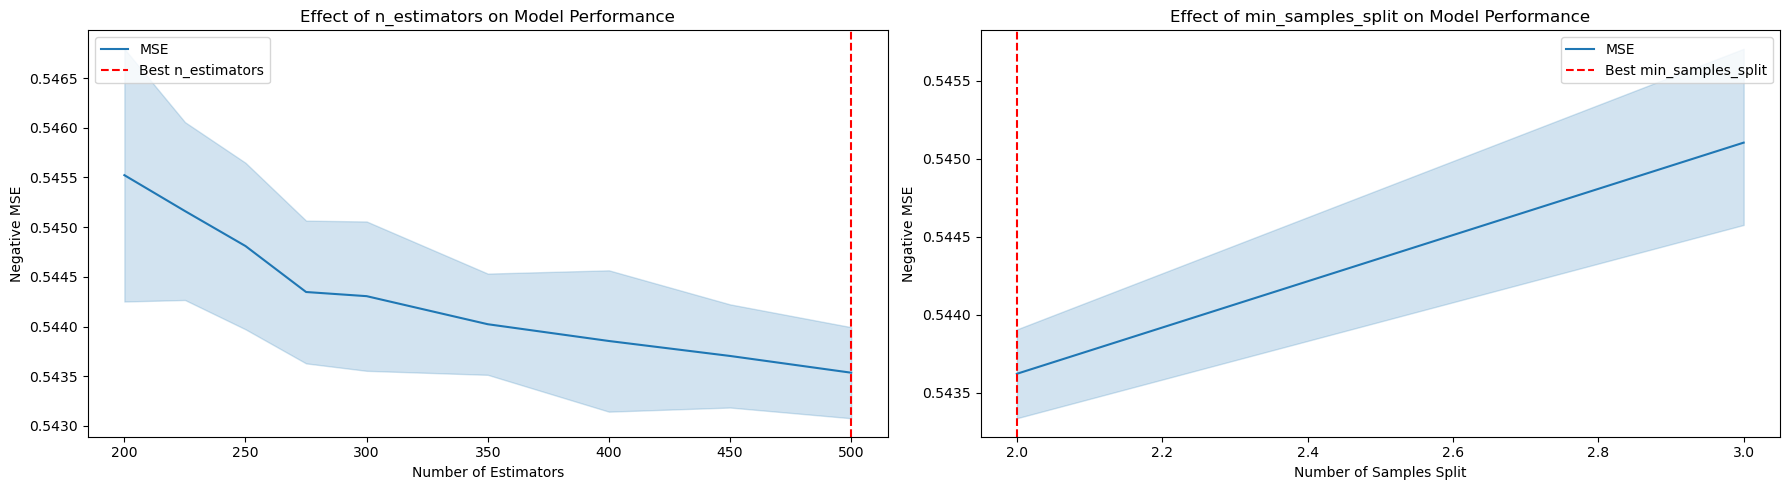

In [15]:
# Convert results to a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Plot hyperparameter tuning results
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot effect of n_estimators
sns.lineplot(ax=axes[0], x=cv_results["param_n_estimators"], y=-cv_results["mean_test_score"], label="MSE")
axes[0].axvline(x=grid_search.best_params_['n_estimators'], color='r', linestyle='--', label='Best n_estimators')
axes[0].set_xlabel("Number of Estimators")
axes[0].set_ylabel("Negative MSE")
axes[0].set_title("Effect of n_estimators on Model Performance")
axes[0].legend()

# Plot effect of min_samples_split
sns.lineplot(ax=axes[1], x=cv_results["param_min_samples_split"], y=-cv_results["mean_test_score"], label="MSE")
axes[1].axvline(x=grid_search.best_params_['min_samples_split'], color='r', linestyle='--', label='Best min_samples_split')
axes[1].set_xlabel("Number of Samples Split")
axes[1].set_ylabel("Negative MSE")
axes[1].set_title("Effect of min_samples_split on Model Performance")
axes[1].legend()



# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Best Model so far:

In [17]:
# Define parameter grid with further refinements
param_grid = {
    "n_estimators": [300],
    "max_depth": [None],  # Adding depth control
    "min_samples_split": [2],
    "min_samples_leaf": [1],  # Controlling leaf size
    "max_features": ["sqrt"],  # Feature selection at each split
    "bootstrap": [True],
    "oob_score": [True],  # Enable Out-of-Bag evaluation
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=seed)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=4, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, oob_score=True; total time=   6.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, oob_score=True; total time=   6.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, oob_score=True; total time=   6.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, oob_score=True; total time=   6.8s


GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=1234),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300],
                         'oob_score': [True]},
             scoring='neg_mean_squared_error', verbose=2)

In [18]:
# Best parameters
best_params_3 = grid_search.best_params_
print("Best Parameters:", best_params_3)

# Best model
best_rf_3 = grid_search.best_estimator_
print("Best Model:", best_rf_3)

# Define 4-fold cross-validation
kf3 = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred_cv = cross_val_predict(best_rf_3, X_cv, y_cv, cv=kf3)

# Metrics
mse_cv_3 = mean_squared_error(y_cv, y_pred_cv)
mae_cv_3 = mean_absolute_error(y_cv, y_pred_cv)

print(f"4-Fold CV MSE: {mse_cv_3:.4f}")
print(f"4-Fold CV MAE: {mae_cv_3:.4f}")



# Predictions and performance evaluation
y_pred = best_rf_3.predict(X_cv)
mse_3 = mean_squared_error(y_cv, y_pred)
r2_3 = r2_score(y_cv, y_pred)

print(f"Final Model MSE: {mse_3:.4f}")
print(f"Final Model R²: {r2_3:.4f}")





Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'oob_score': True}
Best Model: RandomForestRegressor(max_features='sqrt', n_estimators=300, oob_score=True,
                      random_state=1234)
4-Fold CV MSE: 0.6137
4-Fold CV MAE: 0.5960
Final Model MSE: 0.5105
Final Model R²: 0.5630


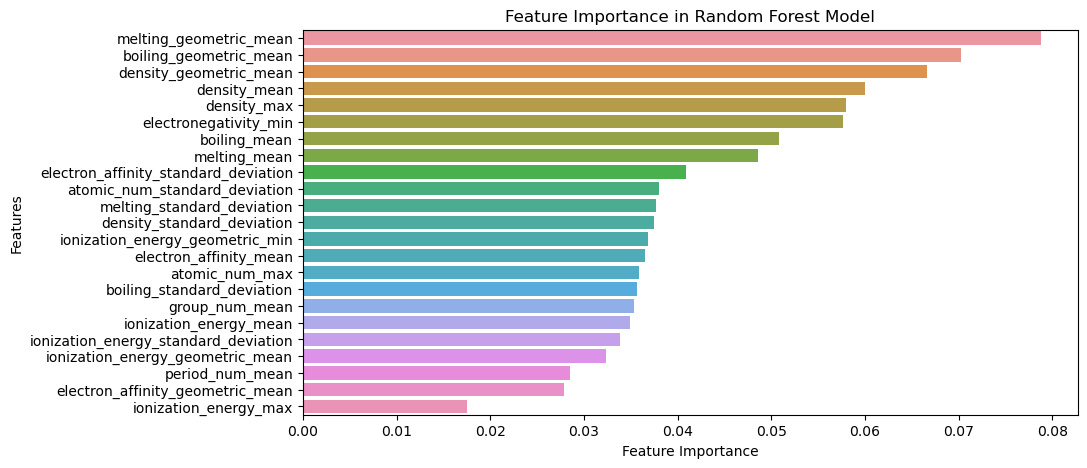

In [20]:
# Feature Importance Analysis
feature_importances = pd.DataFrame({"Feature": int_df.drop(columns=['outputs.hse06.bandgap', 'MOF']).columns[:], "Importance": best_rf_3.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()

Approach 3: Remove some features and see if performance improves

SHAP Feature Importance

In [21]:
import shap

rf.fit(X_train, y_train)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

shap_importances = np.abs(shap_values).mean(axis=0)


In [22]:
top_features_shap = int_df.drop(columns=['outputs.hse06.bandgap', 'MOF']).columns[np.argsort(shap_importances)[-15:]]  # Top 10 features
print("Top 15 Features based on SHAP values:")
for feature in top_features_shap:
    print(feature)
    
# Get indices of top 10 features in original dataset
feature_indices = [int_df.drop(columns=['outputs.hse06.bandgap', 'MOF']).columns.get_loc(f) for f in top_features_shap]

# Select corresponding columns in NumPy arrays
X_train_shap = X_train[:, feature_indices]
X_cv_shap = X_cv[:, feature_indices]

Top 15 Features based on SHAP values:
density_mean
density_standard_deviation
ionization_energy_standard_deviation
electron_affinity_mean
electron_affinity_standard_deviation
group_num_mean
atomic_num_standard_deviation
boiling_geometric_mean
density_geometric_mean
ionization_energy_geometric_min
ionization_energy_max
atomic_num_max
electronegativity_min
density_max
melting_geometric_mean


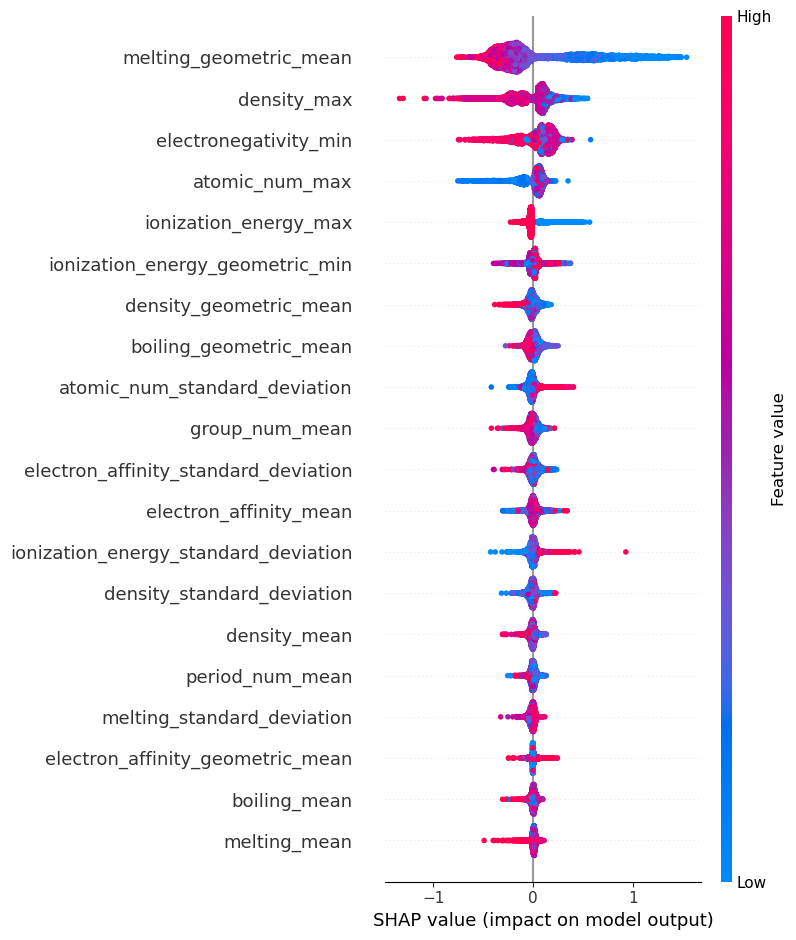

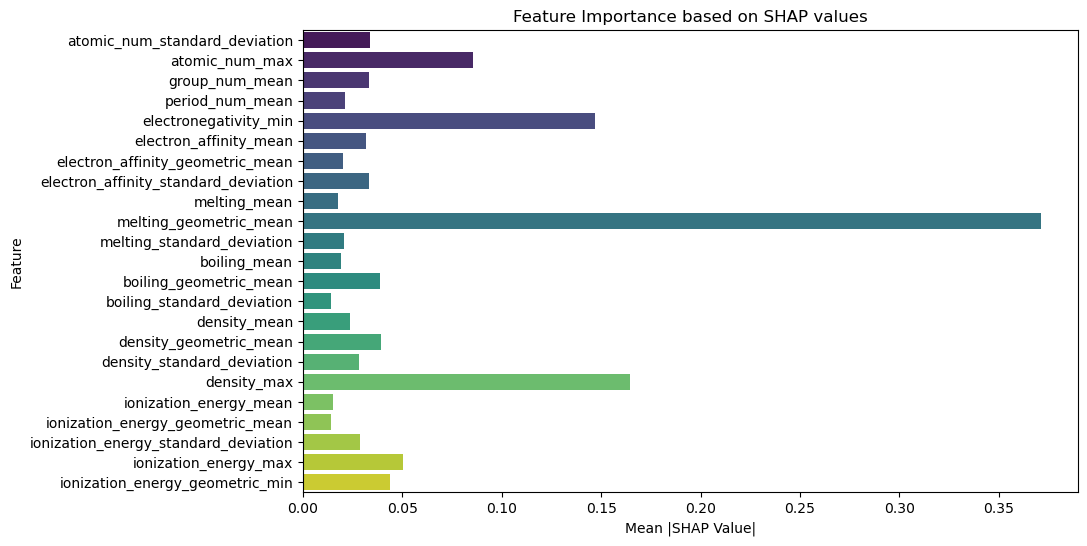

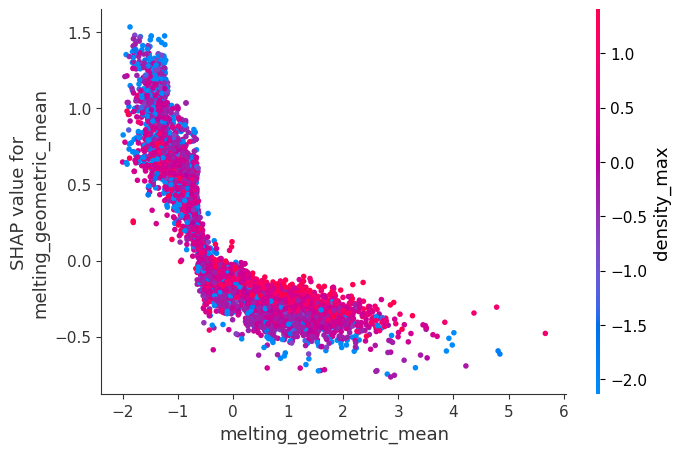

In [23]:
# SHAP summary plot (global feature impact visualization)
shap.summary_plot(shap_values, X_train, feature_names=int_df.drop(columns=['outputs.hse06.bandgap', 'MOF']).columns)

# Compute mean absolute SHAP values for ranking feature importance
shap_importance = np.abs(shap_values).mean(axis=0)

# Get corresponding feature names
feature_names = int_df.drop(columns=['outputs.hse06.bandgap', 'MOF']).columns

# Bar plot of SHAP feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=shap_importance, y=feature_names, palette="viridis")
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Feature")
plt.title("Feature Importance based on SHAP values")
plt.show()

# Dependence plot for the most important feature
most_important_feature = feature_names[np.argmax(shap_importance)]
shap.dependence_plot(most_important_feature, shap_values, X_train, feature_names=feature_names)

### Proceed with top SHAP features and redo GridSearchCV

In [24]:
top_features_shap

Index(['density_mean', 'density_standard_deviation',
       'ionization_energy_standard_deviation', 'electron_affinity_mean',
       'electron_affinity_standard_deviation', 'group_num_mean',
       'atomic_num_standard_deviation', 'boiling_geometric_mean',
       'density_geometric_mean', 'ionization_energy_geometric_min',
       'ionization_energy_max', 'atomic_num_max', 'electronegativity_min',
       'density_max', 'melting_geometric_mean'],
      dtype='object')

In [25]:
# Extract target variable
y = int_df['outputs.hse06.bandgap']

# Keep only the top features
X = int_df[top_features_shap]
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_cv, y_train, y_cv = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)



In [26]:
# Define the Random Forest model
rf = RandomForestRegressor(random_state=seed)

# Define hyperparameter grid for tuning

param_grid = {
    "n_estimators": [300],
    "max_depth": [None],  # Adding depth control
    "min_samples_split": [3],
    "min_samples_leaf": [1],  # Controlling leaf size
    "max_features": ["sqrt"],  # Feature selection at each split
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)



Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   4.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   5.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   5.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   5.0s


GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [3],
                         'n_estimators': [300]},
             scoring='neg_mean_squared_error', verbose=2)

In [39]:
# Best parameters
best_params_4 = grid_search.best_params_
print("Best Parameters:", best_params_4)

# Best model
best_rf_4 = grid_search.best_estimator_
print("Best Model:", best_rf_4)

# Predictions and performance evaluation
y_pred = best_rf_4.predict(X_cv)
mse_4 = mean_squared_error(y_cv, y_pred)
r2_4 = r2_score(y_cv, y_pred)

print(f"Final Model MSE: {mse_4:.4f}")
print(f"Final Model R²: {r2_4:.4f}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
Best Model: RandomForestRegressor(max_features='sqrt', min_samples_split=3,
                      n_estimators=300, random_state=1234)
Final Model MSE: 0.5081
Final Model R²: 0.5650


In [27]:
# Best parameters
best_params_4 = grid_search.best_params_
print("Best Parameters:", best_params_4)

# Best model
best_rf_4 = grid_search.best_estimator_
print("Best Model:", best_rf_4)

# Define 4-fold cross-validation
kf4 = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred_cv = cross_val_predict(best_rf_4, X_cv, y_cv, cv=kf4)

# Metrics
mse_cv_4 = mean_squared_error(y_cv, y_pred_cv)
mae_cv_4 = mean_absolute_error(y_cv, y_pred_cv)

print(f"4-Fold CV MSE: {mse_cv_4:.4f}")
print(f"4-Fold CV MAE: {mae_cv_4:.4f}")



# Predictions and performance evaluation
y_pred = best_rf_4.predict(X_cv)
mse_4 = mean_squared_error(y_cv, y_pred)
r2_4 = r2_score(y_cv, y_pred)

print(f"Final Model MSE: {mse_4:.4f}")
print(f"Final Model R²: {r2_4:.4f}")





Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
Best Model: RandomForestRegressor(max_features='sqrt', min_samples_split=3,
                      n_estimators=300, random_state=1234)
4-Fold CV MSE: 0.5887
4-Fold CV MAE: 0.5835
Final Model MSE: 0.5081
Final Model R²: 0.5650
